In [1]:
import pandas as pd
import numpy as np
from parametros import *
import sys, os
sys.path.append(os.path.join(os.path.dirname(file), "..", ".."))
from prepro_py import preprocesamiento_naive
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.naive_bayes import CategoricalNB
os.chdir("../../../../")

In [2]:
to_csv = False
return_something = True
feature_selection = False
seek_correlation = None

In [3]:
y_data_style = "h1n1"
x_data, y_data, test = preprocesamiento_naive(
    PAHT_OUTPUT,
    features_keep=features_keep,
    features_drop=features_drop,
    y_data_style=y_data_style,
    features_NA_as_cat=features_NA_as_cat,
    imputation_method=imputation_method,
    n_estimators=n_estimators,
    criterion=criterion,
    feature_selection=feature_selection,
    seek_correlation=seek_correlation,
    to_csv=to_csv,
    return_something=return_something,
    sc_max_depth=sc_max_depth,
    print_cor=print_cor,
    value=1000,
    sampling=sampling
    )

Hay 26707 filas y 22440 no tienen NaN
Hay 26708 filas y 22445 no tienen NaN


In [4]:
x_data.drop("respondent_id", axis=1, inplace=True)

In [5]:
f_selector = SFS(
    CategoricalNB(),
    k_features=23, 
    forward=True, 
    floating=False, 
    verbose=2,
    scoring='roc_auc',
    cv=5
    )
f_selector.fit(x_data, np.array(y_data).ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   14.5s finished

[2022-01-12 15:48:48] Features: 1/23 -- score: 0.7025188463654769[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   11.5s finished

[2022-01-12 15:48:59] Features: 2/23 -- score: 0.7805626184077022[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   11.3s finished

[2022-01-12 15:49:11] Features: 3/23 -- score: 0.8202479886053833[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(estimator=CategoricalNB(), k_features=23,
                          scoring='roc_auc', verbose=2)

In [6]:
values = pd.DataFrame.from_dict(f_selector.get_metric_dict()).T
values

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(16,)","[0.7076872089626163, 0.699214441213459, 0.7037...",0.702519,"(opinion_h1n1_risk,)",0.006273,0.004881,0.00244
2,"(9, 16)","[0.7862815173787342, 0.7807698308566905, 0.783...",0.780563,"(doctor_recc_h1n1, opinion_h1n1_risk)",0.011066,0.00861,0.004305
3,"(9, 14, 16)","[0.831635442921332, 0.818610580854858, 0.81942...",0.820248,"(doctor_recc_h1n1, health_insurance, opinion_h...",0.010979,0.008542,0.004271
4,"(9, 14, 15, 16)","[0.8488242272947646, 0.8374628398861139, 0.843...",0.84008,"(doctor_recc_h1n1, health_insurance, opinion_h...",0.010916,0.008493,0.004247
5,"(9, 14, 15, 16, 33)","[0.8559205393988831, 0.8417146166081495, 0.848...",0.846316,"(doctor_recc_h1n1, health_insurance, opinion_h...",0.011524,0.008966,0.004483
6,"(9, 14, 15, 16, 22, 33)","[0.8559933151062473, 0.8422683402636051, 0.849...",0.847287,"(doctor_recc_h1n1, health_insurance, opinion_h...",0.010935,0.008508,0.004254
7,"(9, 14, 15, 16, 21, 22, 33)","[0.8561561442068967, 0.8439619723368541, 0.850...",0.848246,"(doctor_recc_h1n1, health_insurance, opinion_h...",0.01067,0.008302,0.004151
8,"(9, 14, 15, 16, 21, 22, 26, 33)","[0.856722224025617, 0.8448700456235622, 0.8503...",0.848589,"(doctor_recc_h1n1, health_insurance, opinion_h...",0.010818,0.008416,0.004208
9,"(9, 14, 15, 16, 21, 22, 23, 26, 33)","[0.8568336389214954, 0.8445150677128218, 0.850...",0.848726,"(doctor_recc_h1n1, health_insurance, opinion_h...",0.010791,0.008396,0.004198
10,"(2, 9, 14, 15, 16, 21, 22, 23, 26, 33)","[0.8566978258388316, 0.8452463850368956, 0.850...",0.848867,"(behavioral_antiviral_meds, doctor_recc_h1n1, ...",0.01059,0.008239,0.00412


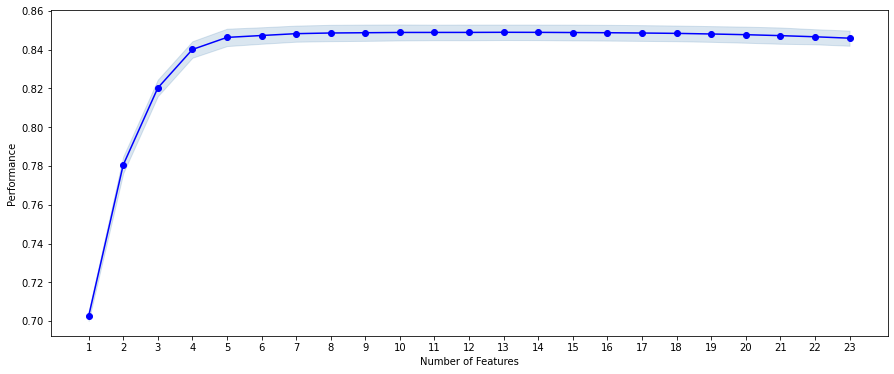

In [7]:
fig = plot_sfs(f_selector.get_metric_dict(), kind='std_err', figsize=(15,6))

In [8]:
x_data.columns.values[[values.feature_idx[13]]]

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_2160/3693307271.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x_data.columns.values[[values.feature_idx[13]]]


array(['behavioral_antiviral_meds', 'behavioral_face_mask',
       'doctor_recc_h1n1', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'age_group',
       'education', 'race', 'marital_status', 'rent_or_own',
       'hhs_geo_region', 'employment_industry'], dtype=object)